# Importing Module and define directories

In [1]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
import CC
importlib.reload(CC)
import neuron_CC
importlib.reload(neuron_CC)
from CC import CCNN
from utils.results import plot_results
from utils.preprocessing import split
from utils.regressor import regressor
from utils.trick_output import lin_sin_lin, trick_params

# Naive Test

In [2]:
input_data = [[0,0],
              [0,1],
              [1,0],
              [1,1]]
labels = [0,0,0,1]
input_data = np.array(input_data)
labels = np.array(labels).reshape((len(labels),1))

In [3]:
hidden_func = 'sigmoid'
output_func = 'sigmoid'
start=1
learning_rate=0.1
netw = CCNN(w_init = start, hidden_actv_f = hidden_func,
            output_actv_f= output_func)

In [4]:
netw.train(input_data, labels,  eta = learning_rate, max_epoch = 10000)

train [0 hidd][MEE=0.30]      


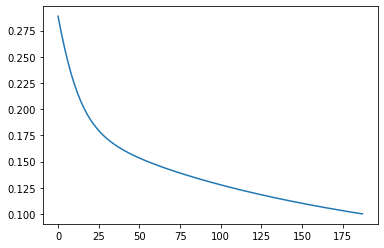

In [5]:
plt.plot(netw.train_MSE)
plt.show()

## XOR test

In [6]:
input_data = [[0,0],
              [0,1],
              [1,0],
              [1,1]]
labels = [1,0,0,1]
input_data = np.array(input_data)
labels = np.array(labels).reshape((len(labels),1))

In [7]:
hidden_func = 'sigmoid'
output_func = 'sigmoid'
start=1
netw = CCNN(w_init = start, hidden_actv_f = hidden_func,
            output_actv_f= output_func)

In [8]:
netw.train(input_data, labels,
           eta = 0.1,
           min_epoch = 20, 
           max_epoch = 200,
           tot_max_epoch = int(1e4),
           stack_threshold = 0.1,
           stop_threshold = 0.05,
           max_hidden = 10, 
           n_candidate = 10,
           candidate_eta = 5,
           candidate_lambda = 0.,
           max_candidate_epoch = 600, 
           RMSProp = True,alpha = 0.1)

hidd 1:[8/10][S=0][MEE:0.50]   

train [1 hidd][MEE=0.22]      


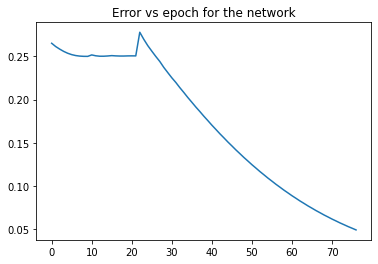

In [9]:
plt.plot(netw.train_MSE)
plt.title('Error vs epoch for the network')
plt.show()

In [10]:
netw.predict(input_data)

array([[0.73976571],
       [0.20351866],
       [0.20351861],
       [0.78847407]])

Hidden trained for 179 epoch


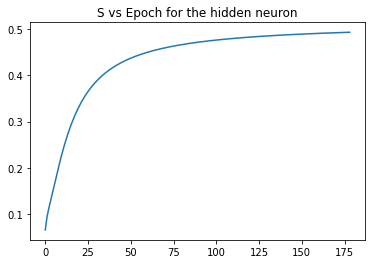

In [11]:
print(f'Hidden trained for {netw.hid_neurons[0].epoch_trained} epoch')
plt.plot(netw.hid_neurons[0].S_list)
plt.title('S vs Epoch for the hidden neuron')
plt.show()

# Train - Validation Split

In [6]:
def plot_results_bad(network):
    train_pred = network.predict(input_data)
    val_pred = network.predict(val_data)
    x = np.arange(len(network.train_MEE))

    fig = plt.figure(figsize=(13,4))

    fig.add_subplot(131)
    plt.plot(x,network.train_MEE)
    plt.plot(x,network.val_MEE,label="test")
    plt.title("Learning curve")
    plt.xlabel("Epochs")
    plt.ylabel("Squared error")
    plt.yscale("log")
    plt.legend()

    fig.add_subplot(132)
    plt.title('Residual for training data')
    plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(labels)),labels[:,1]-train_pred[:,1],".",label="residual1")
    plt.legend()

    fig.add_subplot(133)
    plt.title('Residual for validation data')
    plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(val_labels)),val_labels[:,1]-val_pred[:,1],".",label="residual1")
    plt.legend()
    plt.tight_layout()
    plt.show()
    netw.predict(input_data)

In [7]:
used_data = np.loadtxt("../../data/TR.csv",delimiter=",")
input_data = used_data[:, 1:-2]
input_labels = used_data[:, -2:]

frac_test=0.01
data, test_set, labels, test_labels = split(input_data, input_labels, 
                                            kind="hold_out",frac_training=1-frac_test)

frac_training=0.8
training, validation, labels, val_labels=split(data, labels,kind="hold_out",
                                              frac_training=frac_training)

# Define the MLP

In [8]:
hidden_func = 'tanh'
output_func = 'linear'
start=0.01
learning_rate=0.00005
netw = CCNN(w_init = start, hidden_actv_f = hidden_func,
            output_actv_f= output_func)

## Train the model

In [9]:
start = time.time()
netw.train(training, labels,
           validation, val_labels,
           eta = learning_rate,
           alpha = 0.8,
           min_epoch = 100, 
           max_epoch = 50000,
           tot_max_epoch = int(1e6),
           stack_threshold = 0.001,
           stop_threshold = 0.01,
           max_hidden = 10, 
           n_candidate = 20,
           candidate_eta = 0.1,
           candidate_lambda = 0.,#01,
           max_candidate_epoch = 200,
           candidate_factor = 100,
           RMSProp = False, beta = 0.9,
           candidate_RMSProp = True, candidate_beta = 0.1)
print(f'Elapsed time for training {time.time()-start} s')

train [10 hidd][MEE=1.20]      ]   
Elapsed time for training 47.89426350593567 s


In [10]:
print(netw.train_MEE[-1])
print(netw.val_MEE[-1])
netw.num_hidden

1.2036534950395539
1.3151676816054467


10

## Predict the output

In [12]:
train_pred = netw.predict(training)
val_pred = netw.predict(validation)

# Plot results

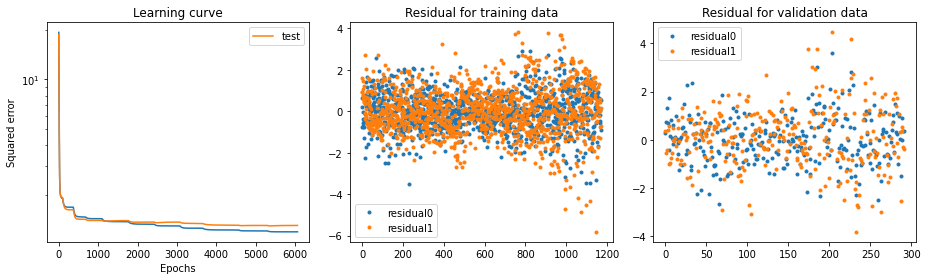

final train error: 1.2036534950395539
final val error: 1.3151676816054467


In [13]:
plot_results(netw, training, validation, labels, val_labels, sortidx = 1)

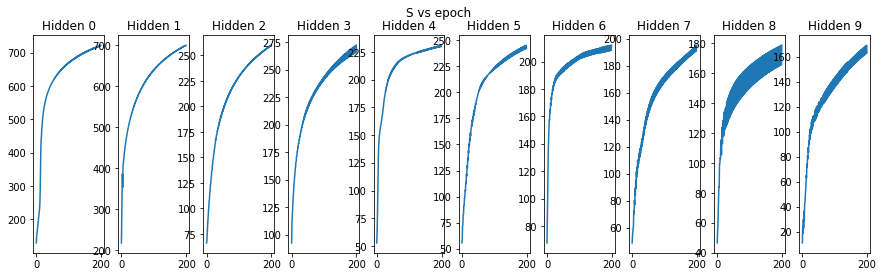

In [14]:
fig, axs = plt.subplots(1, len(netw.hid_neurons), figsize = (15, 4))
for i, hidden in enumerate(netw.hid_neurons):
    axs[i].plot(hidden.S_list)
    axs[i].set_title(f'Hidden {i}')
plt.suptitle('S vs epoch')
plt.show()

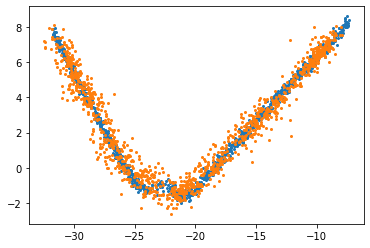

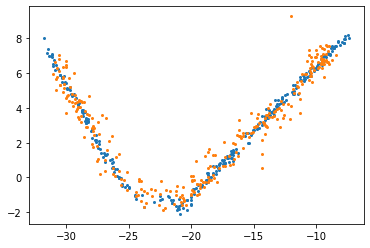

In [15]:
plt.scatter(labels[:,1], labels[:,0], s = 4)
plt.scatter(train_pred[:,1], train_pred[:,0], s = 4)
plt.show()

plt.scatter(val_labels[:,1], val_labels[:,0], s = 4)
plt.scatter(val_pred[:,1], val_pred[:,0], s = 4)
plt.show()

In [16]:
class bagging_ensemble:
    
    def __init__(self, repetition):
        self.repetition = repetition
        self.list_classifier = []
        
    def train(self, data, labels, classifier, dict_classifier, 
              dict_train, split_procedure, dict_split):
        all_data = np.column_stack((data, labels))
        bootstrap_gen = self.bootstrap(all_data, self.repetition)
        for i, all_d in enumerate(bootstrap_gen):
            print(f'{i}/{self.repetition}')
            c = classifier(**dict_classifier)
            d = all_d[:,:-labels.shape[1]]
            l = all_d[:,-labels.shape[1]:]
            training, validation, labels, val_labels = split_procedure(d, l, **dict_split)
            c.train(training, labels, validation, val_labels, **dict_train)
            self.list_classifier.append(c)

    def predict(self, data):
        out = 0
        for c in self.list_classifier:
            out += c.predict(data)
        return out/len(self.list_classifier)
    
    def bootstrap(self, data, repetition = 20, sample_size = None):
        if sample_size == None: sample_size = len(data)
        n_subsample = np.floor(len(data)/repetition).astype(int)
        rng = np.random.default_rng()
        for i in range(repetition):
            subsample = rng.choice(data, n_subsample, axis = 0)
            yield rng.choice(subsample, sample_size, axis = 0)
            
    @property
    def train_MEE(self):
        min_len = np.min([len(c.train_MEE) for c in self.list_classifier])
        
        train_MEE = np.array(self.list_classifier[0].train_MEE[:min_len])
        for c in self.list_classifier[1:]:
            train_MEE += np.array(c.train_MEE[:min_len])
        return train_MEE/len(self.list_classifier)
    @property
    def val_MEE(self):
        min_len = np.min([len(c.val_MEE) for c in self.list_classifier])
        val_MEE = np.array(self.list_classifier[0].val_MEE[:min_len])
        for c in self.list_classifier[1:]:
            val_MEE += np.array(c.val_MEE[:min_len])
        return val_MEE/len(self.list_classifier)

In [25]:
used_data=np.loadtxt("../../data/TR.csv",delimiter=",")


input_data = used_data[:, 1:-2]
input_labels = used_data[:, -2:]

frac_test=0.01
data, test_set, labels, test_labels = split(input_data, input_labels, 
                                            kind="hold_out",frac_training=1-frac_test)

hidden_func = 'sigmoid'
output_func = 'linear'
start=0.001
learning_rate=0.0001

dict_model = dict(w_init = start, hidden_actv_f = hidden_func, output_actv_f= output_func)
dict_train = dict( eta = learning_rate,
                   alpha = 0.8,
                   min_epoch = 100, 
                   max_epoch = 50000,
                   tot_max_epoch = int(1e6),
                   stack_threshold = 0.001,
                   stop_threshold = 0.01,
                   max_hidden = 3, 
                   n_candidate = 10,
                   candidate_eta = 0.1,
                   candidate_lambda = 0.,#01,
                   max_candidate_epoch = 100,
                   candidate_factor = 100,
                   RMSProp = False, beta = 0.9,
                   candidate_RMSProp = True, candidate_beta = 0.1)

frac_training=0.8
dict_split = dict(kind="hold_out", frac_training=frac_training)

bagg = bagging_ensemble(20)
bagg.train(data, labels, CCNN, dict_model, dict_train, split, dict_split)

0/20
train [3 hidd][MEE=1.22]          
1/20
train [3 hidd][MEE=1.11]          
2/20
train [3 hidd][MEE=1.21]          
3/20
train [3 hidd][MEE=1.13]          
4/20
train [3 hidd][MEE=0.91]          
5/20
train [3 hidd][MEE=0.95]          
6/20
train [3 hidd][MEE=1.17]          
7/20
train [3 hidd][MEE=0.93]          
8/20
train [3 hidd][MEE=1.11]          
9/20
train [3 hidd][MEE=0.96]          
10/20
train [3 hidd][MEE=1.03]          
11/20
train [3 hidd][MEE=1.07]          
12/20
train [3 hidd][MEE=1.17]          
13/20
train [3 hidd][MEE=1.16]          
14/20
train [3 hidd][MEE=1.13]          
15/20
train [3 hidd][MEE=0.99]          
16/20
train [3 hidd][MEE=1.35]          
17/20
train [3 hidd][MEE=0.91]          
18/20
train [3 hidd][MEE=1.10]          
19/20
train [3 hidd][MEE=1.10]          


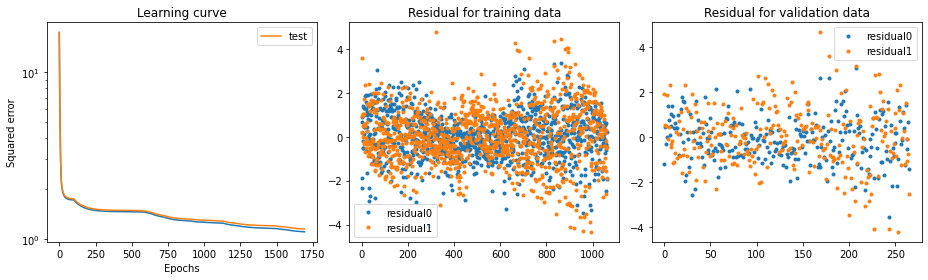

final train error: 1.4099981647145843
final val error: 1.3862450102690695


In [27]:
used_data=np.loadtxt(data_dir + "TR.csv",delimiter=",")

input_data = used_data[:, 1:-2]
input_labels = used_data[:, -2:]

frac_test=0.1
data, test_set, labels, test_labels = split(input_data, input_labels, 
                                            kind="hold_out",frac_training=1-frac_test)
frac_training=0.8
training, validation, labels, val_labels=split(data, labels,kind="hold_out",
                                              frac_training=frac_training)


plot_results(bagg, training, validation, labels, val_labels, sortidx = 1)

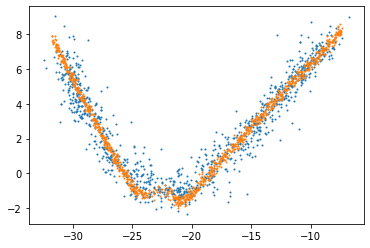

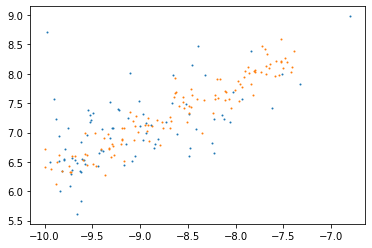

In [28]:
t_pred = bagg.predict(training)
#t_pred = normalizer_labels.denormalize(t_pred)

v_pred = bagg.predict(validation)
#v_pred = normalizer_labels.denormalize(v_pred)

ori_labels = labels#normalizer_labels.denormalize(labels)
ori_val_labels = val_labels#normalizer_labels.denormalize(val_labels)

plt.scatter(t_pred[:,1], t_pred[:,0], s = 1)
plt.scatter(ori_labels[:,1], ori_labels[:,0], s = 1)
plt.show()

zoom1 = -10
zoom2 = -5
m1 = t_pred[:, -1] < zoom2
m2 = t_pred[:, -1] > zoom1
zt_pred = t_pred[np.logical_and(m1, m2)]

m1 = ori_labels[:, -1] < zoom2
m2 = ori_labels[:, -1] > zoom1
z_labels = ori_labels[np.logical_and(m1, m2)]
plt.scatter(zt_pred[:, -1], zt_pred[:, -2], s = 1)
plt.scatter(z_labels[:, -1], z_labels[:, -2], s = 1)
plt.show()

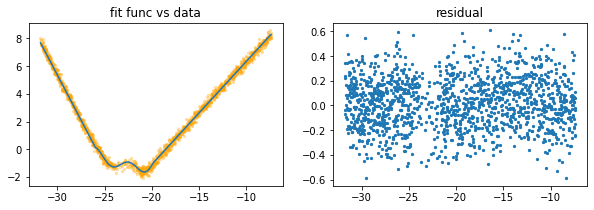

RMS = 7.960462145679653 (root sum of squared residual)


'kmax iteration reached'

In [29]:
raw_data=np.loadtxt(data_dir + "TR.csv",delimiter=",")[:,1:]
np.random.shuffle(raw_data)
data = raw_data[:, :-2]
labels = raw_data[:, -2:]

other_output= labels[:,0]
lin_output= labels[:,1]

x = np.copy(lin_output)
y = np.copy(other_output)

used_data = np.column_stack((data, labels))

xx = np.linspace(np.min(x), np.max(x), 1000)
params = trick_params()

reg = regressor()
reg.fit(x, y, lin_sin_lin, params)
popt_sin = reg.best_params

fig, axs = plt.subplots(1, 2, figsize = (10, 3))
axs[0].plot(xx,lin_sin_lin(xx,*popt_sin))
axs[0].scatter(x, y, s = 5, label ='real', alpha = 0.3, c='orange')
axs[0].set_title('fit func vs data')
axs[1].scatter(x, y-lin_sin_lin(x,*popt_sin), s = 5)
axs[1].set_title('residual')
plt.show()
RMS = np.sqrt(np.sum((y-lin_sin_lin(x,*popt_sin))**2))
print(f'RMS = {RMS} (root sum of squared residual)')
reg.reason

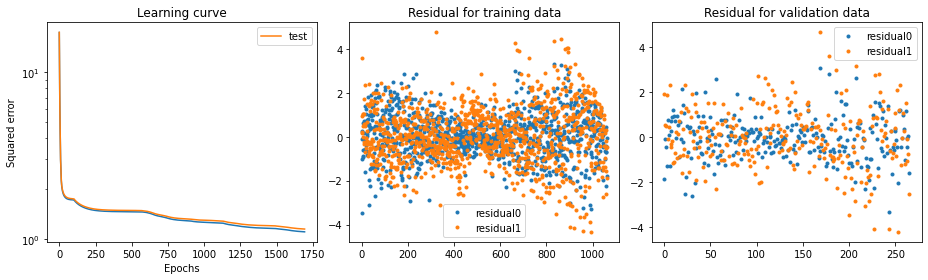

final train error: 1.3321569196275536
final val error: 1.3054864000321436


In [30]:
plot_results(bagg, training, validation, ori_labels, ori_val_labels,
             func = lin_sin_lin, func_args = popt_sin, mean_fit = True, sortidx = 1)

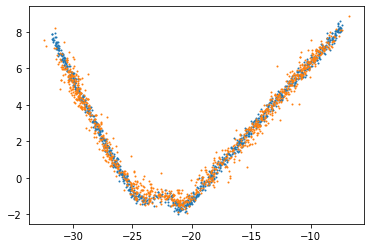

In [31]:
pred = bagg.predict(training)
out_fitted = lin_sin_lin(pred[:, 1], *popt_sin)
mean_fitted = 0.5*(out_fitted + pred[:,0])
plt.scatter(ori_labels[:,1], ori_labels[:,0], s = 1)
plt.scatter(pred[:,1], mean_fitted, s = 1)
plt.show()